# **Visualizando os dados**

- ### Total Idiomas

    > Vamos importar a base TMDB, em seguida faremos uma avaliação de quantos idiomas existem em nosso arquivo .csv, primeiro efetuando a contagem dos valores e índices.

In [2]:
import pandas as pd
baseTMDB = pd.read_csv("https://raw.githubusercontent.com/gitdowellington/primeiros-passos-data-science/refs/heads/main/1.analise-exploratoria/base-dados/tmdb_5000_movies.csv")

### **Combinação do método .value_counts( ).values**

O método .value_counts( ).values é uma combinação de ferramentas que te permite:

- **Contar a frequência de valores únicos:** 
    - A parte .value_counts( ) conta quantas vezes cada valor único aparece em uma série ou coluna de um DataFrame.
    
- **Obter os valores de contagem:** 
    - A parte .values extrai os valores numéricos resultantes da contagem, ou seja, a quantidade de vezes que cada valor único aparece.
    
Em resumo, .value_counts( ).values retorna um array NumPy contendo as frequências de cada valor único, na mesma ordem que os valores únicos são apresentados em .value_counts( ).index

- Exemplo de como usar a combinação do método .values_counts( ).values:

In [3]:
baseTMDB["original_language"].value_counts().values

array([4505,   70,   32,   27,   27,   19,   16,   14,   12,   11,   11,
          9,    7,    5,    4,    4,    3,    3,    2,    2,    2,    2,
          2,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
          1,    1,    1,    1])

### **Combinação do método .value_counts( ).index**

O método .value_counts().index é uma combinação poderosa de ferramentas que te permite:

- **Contar a frequência de valores únicos:** 
    - A parte .value_counts( ) conta quantas vezes cada valor único aparece em uma série ou coluna de um DataFrame.
- **Obter os índices:** 
    - A parte .index extrai os próprios valores únicos que foram contados, colocando-os em um índice.

Em resumo, .value_counts( ).index retorna uma lista (ou um índice em um Series) dos valores únicos, ordenados de forma descendente pela frequência.

- Exemplo de como usar a combinação do método .values( ).index:

In [4]:
baseTMDB["original_language"].value_counts().index

Index(['en', 'fr', 'es', 'zh', 'de', 'hi', 'ja', 'it', 'cn', 'ko', 'ru', 'pt',
       'da', 'sv', 'nl', 'fa', 'th', 'he', 'id', 'cs', 'ta', 'ro', 'ar', 'te',
       'hu', 'xx', 'af', 'is', 'tr', 'vi', 'pl', 'nb', 'ky', 'no', 'sl', 'ps',
       'el'],
      dtype='object', name='original_language')

> Em seguida, contaremos os valores da coluna original_language, transformando-os em um DataFrame, e reiniciaremos o índice da coluna. Vamos também mudar o nome das colunas para uma de fácil interpretação e exibir os 5 primeiros elementos:

### **Combinação dos métodos: .value_counts( ).to_frame( ).reset_index( )**

Em termos simples, essa sequência de métodos no Pandas transforma uma série de contagens de valores únicos em um DataFrame completo e mais fácil de manipular.

- **Passo a passo:**

    - **.value_counts()**: 
        - Conta quantas vezes cada valor único aparece em uma série ou coluna de um DataFrame.
    - **.to_frame():**
        - Transforma a série resultante de .value_counts() em um DataFrame. O índice do DataFrame será os valores únicos e a coluna será a contagem correspondente.
    - **.reset_index():** 
        - "Reseta" o índice do DataFrame, transformando o índice atual (que eram os valores únicos) em uma coluna regular. Isso cria um DataFrame com duas colunas: uma com os valores únicos e outra com suas respectivas contagens.

- Por que usar essa combinação?

    - **Flexibilidade:**
        - O DataFrame resultante é mais fácil de manipular e combinar com outros DataFrames.

    - **Visualização:** 
        - Você pode usar esse DataFrame para criar gráficos, tabelas e outras visualizações de dados.

- Exemplo de como utilizar a combinação dos metodos: .value_counts( ).to_frame( ).reset_index( ): 

In [5]:
contagem_de_lingua = baseTMDB["original_language"].value_counts().to_frame().reset_index()
contagem_de_lingua.columns = ["original_language", "total"]
contagem_de_lingua.head()

,original_language,total
0,en,4505
1,fr,70
2,es,32
3,zh,27
4,de,27


> Com o Seaborn, iremos plotar alguns gráficos para trabalharmos a visualização desses dados. Vamos passar o original_language para o eixo x; total para o eixo y; e contagem_de_lingua como fonte dos dados:

### **Função: .barplot( ) - Biblioteca Seborn**:

- O seaborn.barplot( ) é uma função poderosa da biblioteca Seaborn em Python, utilizada para criar gráficos de barras. Esses gráficos são ideais para visualizar a relação entre uma variável categórica (por exemplo, gênero, país, categoria de produto) e uma variável numérica (por exemplo, idade, preço, quantidade).

- **Pra que serve ?**
    - **Comparação de grupos:** 
        - Permite comparar a média (ou outra medida estatística) de uma variável numérica entre diferentes categorias.

    - **Visualização de distribuições:** 
        - Mostra a distribuição de uma variável numérica para cada categoria, ajudando a identificar padrões e tendências.

    - **Identificação de outliers:** 
        - Auxilia na identificação de valores atípicos em cada categoria.

- **Como funciona ?**
    - **Variáveis:**
        - **data:** O DataFrame que contém os dados.
        - **x:** Variável categórica que será representada no eixo x.
        - **y:** Variável numérica que será representada no eixo y.
    
    - **Visualização:**
        - Cada barra representa a média da variável numérica para uma determinada categoria.
        - A altura da barra indica o valor da média.
        - As barras de erro (opcional) mostram a incerteza na estimativa da média. 






- Exemplo de como usar a função .barplot( ):

<Axes: xlabel='original_language', ylabel='total'>

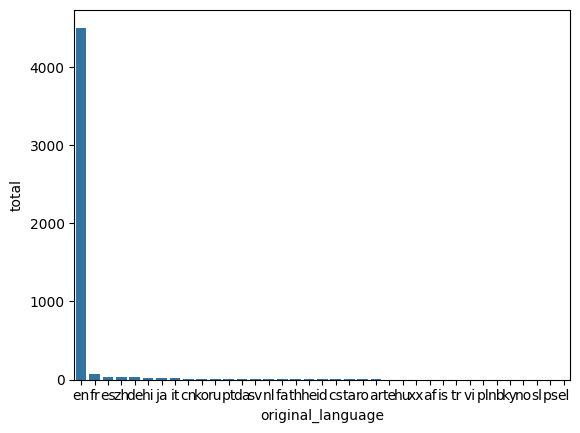

In [6]:
import seaborn as sns

sns.barplot(x="original_language", y = "total", data = contagem_de_lingua)

> Também podemos criar um gráfico de barras com dados categóricos (categorias) com o countplot( ), passando apenas a coluna com as categorias no eixo x ou y para que ele efetue a contagem dos elementos na coluna:

## **Função: countplot( ) - Biblioteca Seborn**:

- O countplot( ) é uma função poderosa da biblioteca Seaborn do Python, especificamente projetada para criar gráficos de barras que visualizam a frequência de cada categoria em uma variável categórica. Em outras palavras, ele conta quantas vezes cada valor único aparece em uma determinada coluna de um DataFrame.

- **Para que serve?**

    - **Análise Exploratória de Dados:** 
        - É uma ferramenta essencial para entender a distribuição de dados categóricos, identificando quais categorias são mais ou menos frequentes.
    - **Visualização Rápida:** 
        - Permite uma visualização imediata e intuitiva da distribuição de dados categóricos, facilitando a compreensão de padrões.
    - **Comparação de Categorias:** 
        - Facilita a comparação entre diferentes categorias, destacando diferenças e similaridades.
    - **Identificação de Outliers:** 
        - Pode auxiliar na identificação de valores atípicos ou categorias com frequências inesperadas.

- **Variáveis:**
    - **data:** 
        - O DataFrame que contém os dados.
    - **x:** 
        - Nome da coluna que contém a variável categórica.

- **Opções e Personalizações**

    - **Ordenação:**
        - **order:** 
            - Permite personalizar a ordem das categorias no eixo x.
        - **hue:** 
            - Adiciona uma variável categórica para criar gráficos empilhados ou lado a lado.
    - **Estilos:**
        - **palette:** 
            - Define a paleta de cores para as barras.
        - **style:** 
            - Aplica diferentes estilos visuais ao gráfico (e.g., 'whitegrid', 'darkgrid').
        - **dodge:** 
            - Controla o espaçamento entre as barras quando se usa hue.
        - **orient:** 
            - Define a orientação do gráfico (horizontal ou vertical).

- Exemplo de como usar a função .countplot( ): 

<Axes: xlabel='original_language', ylabel='count'>

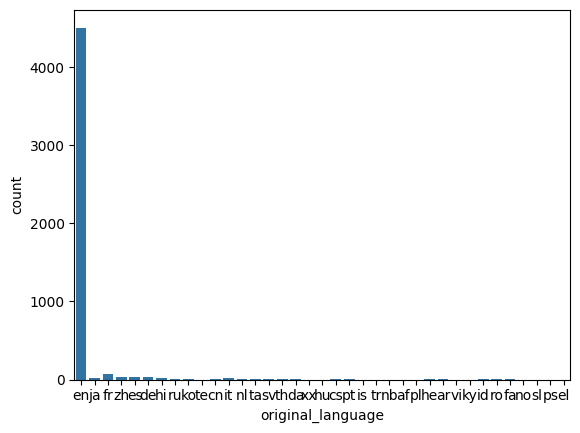

In [7]:
sns.countplot(data=baseTMDB, x="original_language")

### Total dos idiomas exceto inglês (en)

> Seguindo o contexto da aula com o dados do TMDB e a biblioteca do Seaborn importada, vamos agora verificar a quantidade de línguas que existem no nosso dataframe, exceto a língua inglesa.

> Para isso, começaremos contando os valores das categorias (línguas) que existem no DataFrame. Em seguida, somamos esses valores, passando para a variável total_geral. Dessa variável, iremos subtrair somente os filmes cuja língua é inglês (en), resultando no nosso total_do_resto:

In [8]:
total_por_lingua = baseTMDB["original_language"].value_counts()
total_geral = total_por_lingua.sum()
total_de_ingles = total_por_lingua.loc["en"]
total_do_resto = total_geral - total_de_ingles
print(total_geral, total_de_ingles, total_do_resto)

4803 4505 298


> Prosseguindo, criaremos um dicionário do Pandas contendo duas colunas: "lingua", dividida entre ingles e outros; e "total", com os valores de total_de_ingles e total_do_resto. Com esse dicionário, iremos gerar um DataFrame:

In [9]:
dados = {
  "lingua" : ["ingles", "outros"],
  "total" : [total_de_ingles, total_do_resto]
}
dados = pd.DataFrame(dados)
dados

,lingua,total
0,ingles,4505
1,outros,298


> Por fim, vamos criar, então, um gráfico de barras no qual o eixo x terão as línguas da base, e o y as ocorrências no conjunto:

<Axes: xlabel='lingua', ylabel='total'>

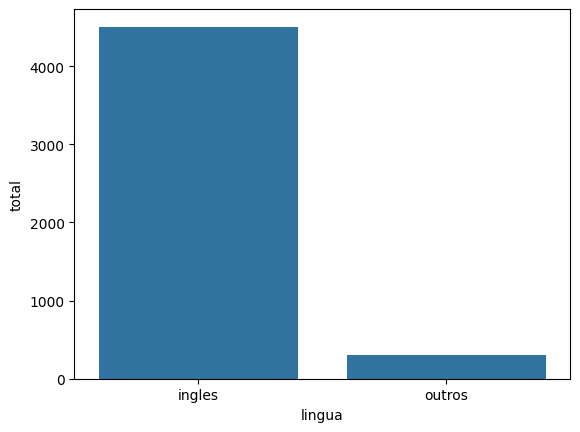

In [10]:
sns.barplot(x="lingua", y="total", data = dados)

- Analisando essas visualizações e lembrando dos conhecimentos adquiridos em aula, como podemos gerar um gráfico de pizza?

A função plt.pie() do módulo matplotlib.pyplot é utilizada para criar gráficos de pizza em Python. Esses gráficos são ideais para representar dados categóricos como proporções de um todo.



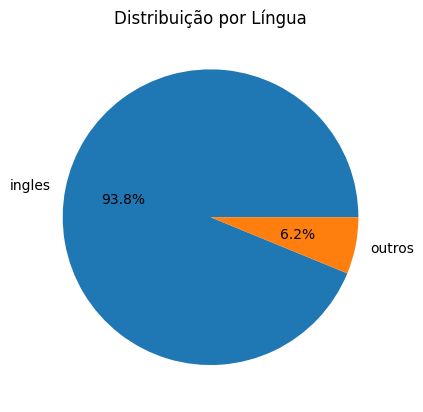

In [11]:
import matplotlib.pyplot as plt

plt.pie(dados['total'], labels=dados['lingua'], autopct='%1.1f%%')
plt.title('Distribuição por Língua')
plt.show()

In [12]:
filmes_nao_ingleses = baseTMDB.query("original_language != 'en'")['original_language'].value_counts()
filmes_nao_ingleses.head()

original_language
fr    70
es    32
zh    27
de    27
hi    19
Name: count, dtype: int64

<Axes: xlabel='original_language', ylabel='count'>

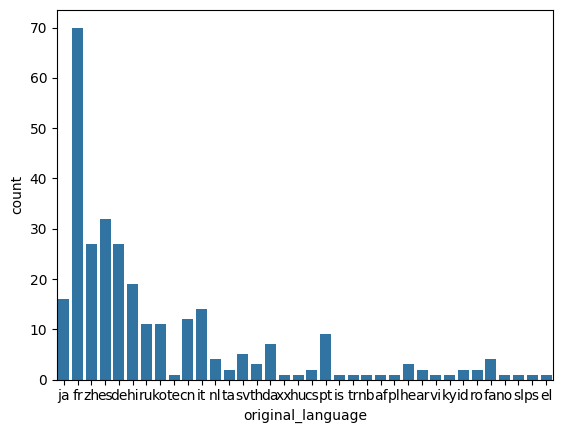

In [13]:
sns.countplot(data = baseTMDB.query("original_language != 'en'"), x = "original_language")

<Axes: xlabel='original_language', ylabel='count'>

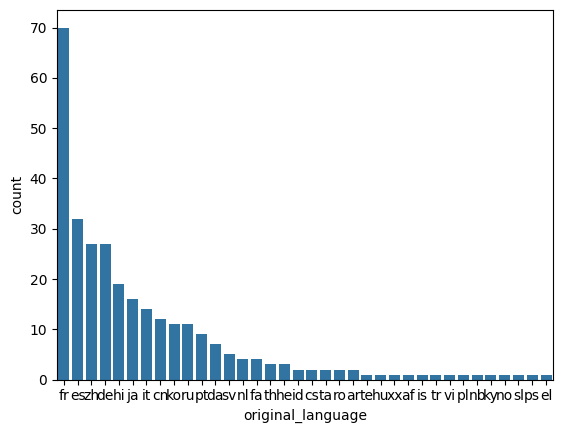

In [17]:
sns.countplot(data = baseTMDB.query("original_language != 'en'"), order = filmes_nao_ingleses.index, x = "original_language")

<Axes: xlabel='original_language', ylabel='count'>

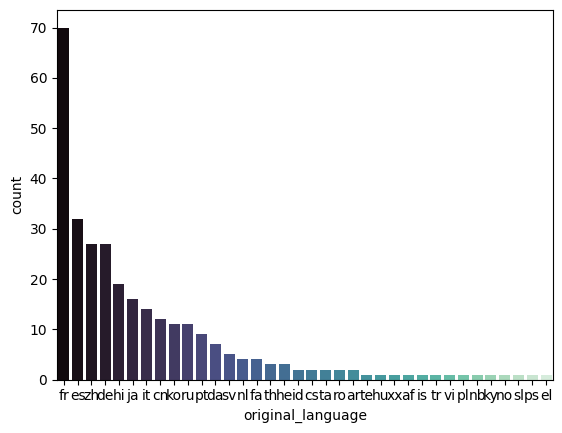

In [31]:
sns.countplot(data = baseTMDB.query("original_language != 'en'"), 
              order = filmes_nao_ingleses.index, 
              palette = "mako",  
              hue="original_language",
              hue_order = filmes_nao_ingleses.index,
              x = "original_language")